<a href="https://colab.research.google.com/github/blakedshull/datascience/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Upon exploring I would like to use my second choice, Taiwanese real estate

# My second choice is Taiwanese Real Estate data.

In [3]:
filename = '/content/Real estate valuation data set.xlsx'
df = pd.read_excel(filename)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.shape

(414, 8)

Everything is the right data type

In [5]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

Checking for duplicates

In [6]:
df.duplicated().sum()

0

Renaming columns for legibility

In [7]:
df = df.rename(columns={'X1 transaction date': 'transaction date', 'X2 house age': 'house age', 'X3 distance to the nearest MRT station': 'distance to the nearest MRT station',
                          'X4 number of convenience stores': 'number of convenience stores', 'X5 latitude': 'latitude', 'X6 longitude': 'longitude', 
                          'Y house price of unit area': 'house price of unit area'})

In [8]:
df.isna().sum()

No                                     0
transaction date                       0
house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

Checking for outliers: no outliers

In [9]:
df.describe()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Scatter plots are the best way to interpret this data because they are for two numerical variables, and all of these columns are numerical

Text(0, 0.5, 'Age')

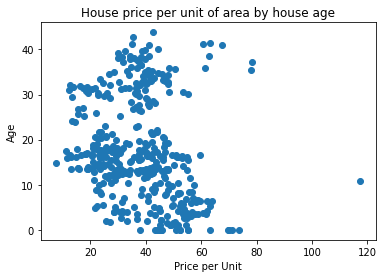

In [10]:
plt.scatter(data = df, x = 'house price of unit area', y = 'house age')
plt.title("House price per unit of area by house age")
plt.xlabel("Price per Unit")
plt.ylabel("Age")

There is definitely one outlier in price per unit, as seen on both graphs

Text(0, 0.5, 'Distance to nearest mass rapid transit')

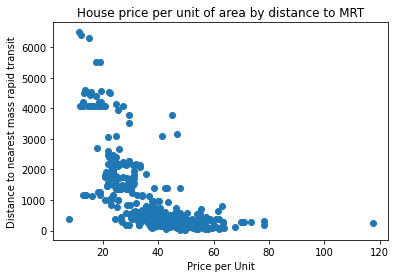

In [11]:
plt.scatter(data = df, x = 'house price of unit area', y = 'distance to the nearest MRT station')
plt.title("House price per unit of area by distance to MRT")
plt.xlabel("Price per Unit")
plt.ylabel("Distance to nearest mass rapid transit")

There seem to be two or three homes that are extremely far out from MRT, probably rural

### 1) Source of data

I found this data on UCI's machine learning repository.  It is gathered from Taiwan.

### 2) Brief description of data
This table contains  414 houses, sale date, age of house, distance to mass rapid transit station, number of conveience stores within walking distance, latitude, longitude, and price per ping (1 ping = 3.3m squared)
### 3) What is the target?
The target is the house price of unit area.  

### 4) Is this a classification or regression problem?
This is a regression problem, price is a numerical set of values.

### 5) How many features?
8, although 1 of them is just ID and is therefore useless.

### 6) How many rows of data.
There are 414 rows of data.

### 7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
One challenge in this data set is the limited area, this is only one district in one city.  

This data is also old, it may not be as useful.

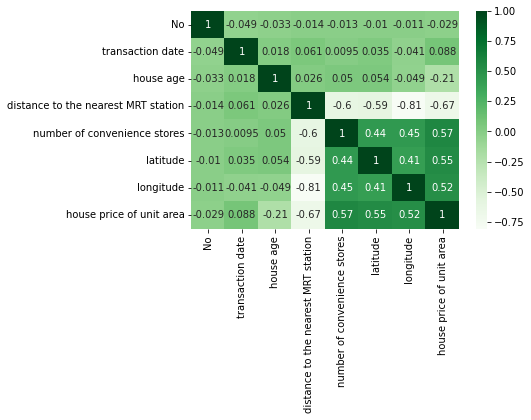

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot=True)

## Positive Correlations
House price per unit of area is positively correlated with number of convenience stores nearby, longitude, and latitude.  Those three variables are all correlated with each other

## Negative Correlations
The most powerful predictor is distance from the nearest Mass Rapid Transit station.  It is very negatively correlated with House price per unit, and also the positively correlated variables listed above (convenience stores, long, lat)

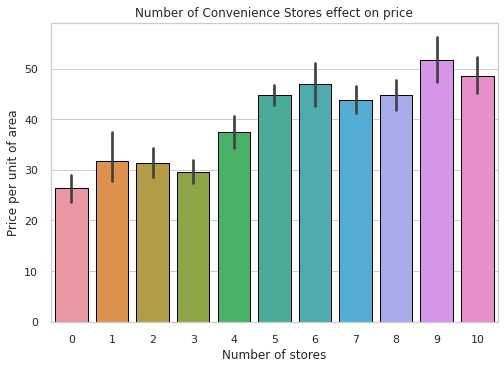

In [13]:
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.barplot(data = df, x = 'number of convenience stores', y = 'house price of unit area', edgecolor='black', )
plt.title("Number of Convenience Stores effect on price")
plt.xlabel("Number of stores")
plt.ylabel("Price per unit of area")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

This graph clearly visualizes the positive correlation between convenience stores and average price per unit of area.  

Text(0, 0.5, 'Latitude')

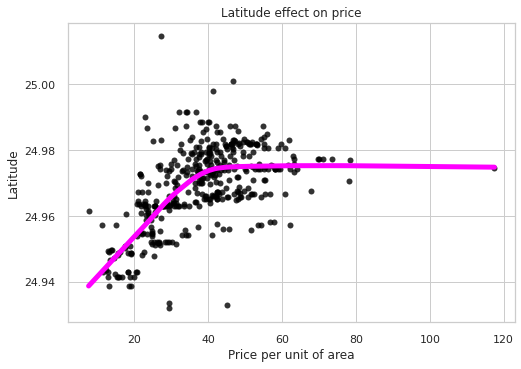

In [14]:
sns.regplot(data = df, x = 'house price of unit area', y = 'latitude', lowess=True, color="black", 
            line_kws={"color":"magenta", "linewidth":5})
plt.title("Latitude effect on price")
plt.xlabel("Price per unit of area")
plt.ylabel("Latitude")

Text(0, 0.5, 'Longitude')

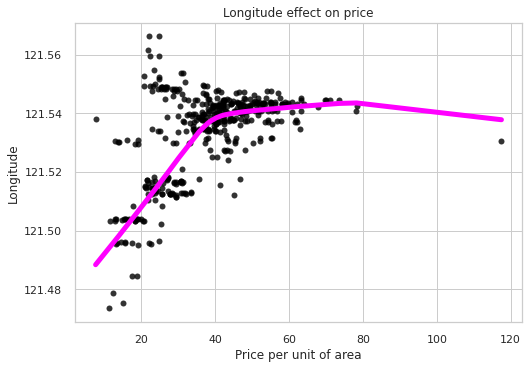

In [15]:
sns.regplot(data = df, x = 'house price of unit area', y = 'longitude', lowess=True, color="black", 
            line_kws={"color":"magenta", "linewidth":5})
plt.title("Longitude effect on price")
plt.xlabel("Price per unit of area")
plt.ylabel("Longitude")

Text(0, 0.5, 'distance to MRT')

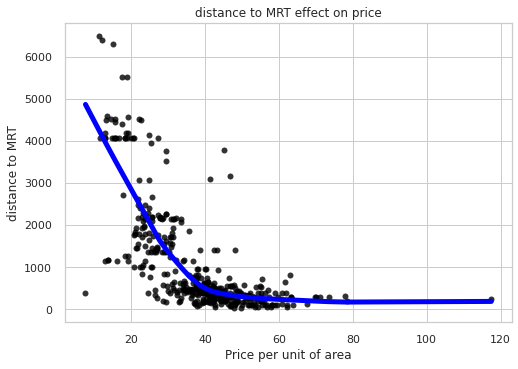

In [16]:
sns.regplot(data = df, x = 'house price of unit area', y = 'distance to the nearest MRT station', lowess=True, color="black", 
            line_kws={"color":"blue", "linewidth":5})
plt.title("distance to MRT effect on price")
plt.xlabel("Price per unit of area")
plt.ylabel("distance to MRT")

The graphs above show a line of best fit wherein longitude and latitude are very positively correlated with price up to a point, but it then evens out and is not relevant past a certain area.  High latitude is north, and in Taiwan, east is high longitude.  Northeast is the most expensive area.

## Pre-processing steps
The No column is irrelevant

In [17]:
df = df.drop('No', axis=1)
df.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


### House price per unit of area is going to be the target for the purposes of all this analysis.

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.tree import DecisionTreeRegressor

In [19]:
def evaluate(model,X_train,X_test,y_train,y_test):
    print(f"Training Accuracy: {model.score(X_train, y_train):.3f}")
    print(f"Test Accuracy: {model.score(X_test, y_test):.3f}")

In [20]:
X = df.drop(columns=['house price of unit area'])
y = df['house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()

In [21]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_pipe = make_pipeline(scaler, dec_tree)
dec_pipe.fit(X_train, y_train)
evaluate(dec_pipe, X_train, X_test, y_train, y_test)

Training Accuracy: 0.997
Test Accuracy: 0.574


,Test Score,Train Score
3,0.679844,0.704898
4,0.651062,0.803898
5,0.6451,0.868188
8,0.613142,0.952629
6,0.612496,0.914958


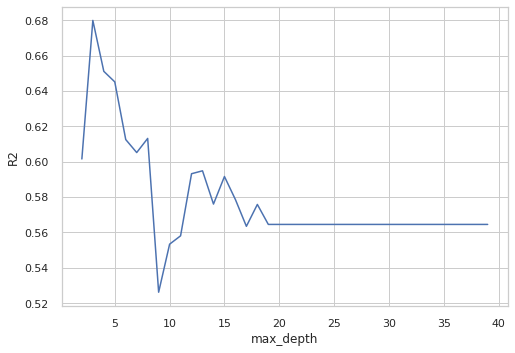

In [22]:
depths = list(range(2, 40))
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    train_score = dec_tree.score(X_train, y_train)
    test_score = dec_tree.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

In [23]:
dec_tree_fin = DecisionTreeRegressor(max_depth = 3, random_state = 42)
dec_tree_fin.fit(X_train, y_train)
train_3_score = dec_tree_fin.score(X_train, y_train)
test_3_score = dec_tree_fin.score(X_test, y_test)
evaluate(dec_tree_fin, X_train, X_test, y_train, y_test)

Training Accuracy: 0.705
Test Accuracy: 0.680


,Test Score,Train Score
9,0.708837,0.782708
4,0.708466,0.86408
13,0.706881,0.740229
10,0.70607,0.778763
6,0.705592,0.827636


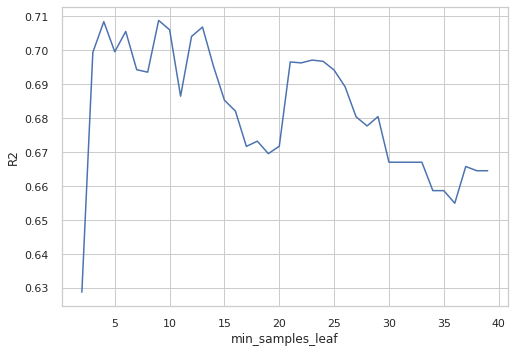

In [73]:
samples = list(range(2, 40))
scores2 = pd.DataFrame(index=samples, columns=['Test Score','Train Score'])
for sample in samples:
    dec_tree_fin = DecisionTreeRegressor(min_samples_leaf=sample, random_state=42)
    dec_tree_fin.fit(X_train, y_train)
    train_score = dec_tree_fin.score(X_train, y_train)
    test_score = dec_tree_fin.score(X_test, y_test)
    scores2.loc[sample, 'Train Score'] = train_score
    scores2.loc[sample, 'Test Score'] = test_score
plt.plot(samples, scores2['Test Score'])
plt.xlabel('min_samples_leaf')
plt.ylabel('R2');
sorted_scores2 = scores2.sort_values(by='Test Score', ascending=False)
sorted_scores2.head()

In [25]:
dec_tree_fin = DecisionTreeRegressor(min_samples_leaf = 9, random_state = 42)
dec_tree_fin.fit(X_train, y_train)
train_3_score = dec_tree_fin.score(X_train, y_train)
test_3_score = dec_tree_fin.score(X_test, y_test)
evaluate(dec_tree_fin, X_train, X_test, y_train, y_test)

Training Accuracy: 0.783
Test Accuracy: 0.709


,Test Score,Train Score
26,0.709301,0.78269
39,0.709267,0.782708
31,0.709267,0.782708
27,0.709267,0.782708
28,0.709267,0.782708


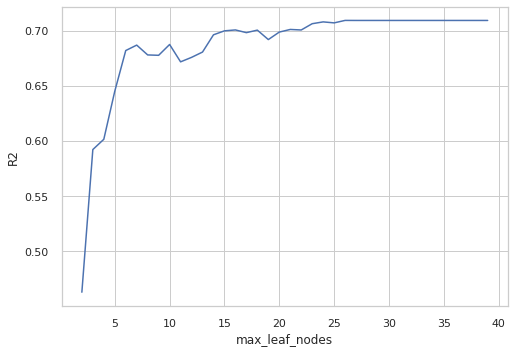

In [77]:
leaves = list(range(2, 40))
scores3 = pd.DataFrame(index=leaves, columns=['Test Score','Train Score'])
for leaf in leaves:
    dec_tree_fin = DecisionTreeRegressor(max_leaf_nodes=leaf, min_samples_leaf = 9, random_state=42)
    dec_tree_fin.fit(X_train, y_train)
    train_score = dec_tree_fin.score(X_train, y_train)
    test_score = dec_tree_fin.score(X_test, y_test)
    scores3.loc[leaf, 'Train Score'] = train_score
    scores3.loc[leaf, 'Test Score'] = test_score
plt.plot(leaves, scores3['Test Score'])
plt.xlabel('max_leaf_nodes')
plt.ylabel('R2');
sorted_scores3 = scores3.sort_values(by='Test Score', ascending=False)
sorted_scores3.head()

In [57]:
dec_tree_fin = DecisionTreeRegressor(max_leaf_nodes = 26, min_samples_leaf = 9, random_state = 42)
dec_tree_fin.fit(X_train, y_train)
evaluate(dec_tree_fin, X_train, X_test, y_train, y_test)

Training Accuracy: 0.783
Test Accuracy: 0.709


dec_tree_fin is the best optimized decision tree for the base model

In [31]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

bagreg = BaggingRegressor(random_state = 42)

In [32]:
bagreg = BaggingRegressor(random_state = 42)

In [33]:
bagreg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [34]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9450218228127787
0.7196869311026053


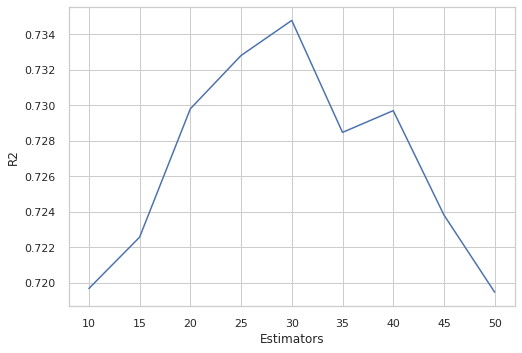

,Train Score,Test Score
30,0.948593,0.734774
25,0.950654,0.7328
20,0.949814,0.729799
40,0.946028,0.729698
35,0.945867,0.728474
45,0.9443,0.723825
15,0.949612,0.722577
10,0.945022,0.719687
50,0.943717,0.719481


In [78]:
estimators = [10, 15, 20, 25, 30, 35, 40, 45, 50]
bag_scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])
for num_estimators in estimators:
   bag_reg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
   bag_reg.fit(X_train, y_train)
   bag_train_score = bag_reg.score(X_train, y_train)
   bag_test_score = bag_reg.score(X_test, y_test)
   bag_scores.loc[num_estimators, 'Train Score'] = bag_train_score
   bag_scores.loc[num_estimators, 'Test Score'] = bag_test_score

plt.xlabel('Estimators')
plt.ylabel('R2');
plt.plot(bag_scores['Test Score'])
plt.show()
bag_scores = bag_scores.sort_values(by='Test Score', ascending=False)
bag_scores

In [50]:
bag_reg_fin = BaggingRegressor(n_estimators=30,)
bag_reg_fin.fit(X_train, y_train)
evaluate(bag_reg_fin, X_train, X_test, y_train, y_test)

Training Accuracy: 0.951
Test Accuracy: 0.734


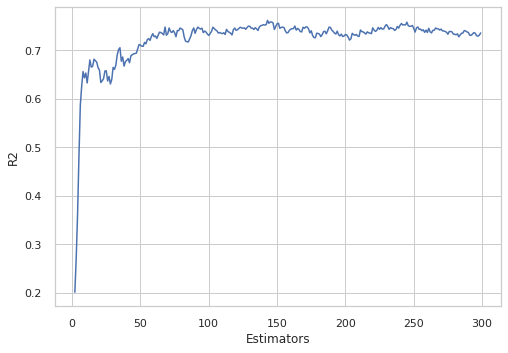

,Train Score,Test Score
143,0.87628,0.761878
145,0.878189,0.758795
146,0.878566,0.75849
245,0.92658,0.758193
147,0.878415,0.757
...,...,...
6,0.563503,0.587331
5,0.479574,0.483198
4,0.408534,0.364336
3,0.298041,0.272948


In [80]:
samples = list(range(2, 300))
bag_scores2 = pd.DataFrame(index=samples, columns=['Train Score', 'Test Score'])
for sample in samples:
   bag_reg_fin = BaggingRegressor(max_samples=sample, random_state=42,n_estimators=30)
   bag_reg_fin.fit(X_train, y_train)
   bag_train_score = bag_reg_fin.score(X_train, y_train)
   bag_test_score = bag_reg_fin.score(X_test, y_test)
   bag_scores2.loc[sample, 'Train Score'] = bag_train_score
   bag_scores2.loc[sample, 'Test Score'] = bag_test_score

plt.xlabel('Estimators')
plt.ylabel('R2');
plt.plot(bag_scores2['Test Score'])
plt.show()
bag_scores2 = bag_scores2.sort_values(by='Test Score', ascending=False)
bag_scores2

In [81]:
bag_reg_fin = BaggingRegressor(max_samples=143, n_estimators=30, random_state=42)
bag_reg_fin.fit(X_train, y_train)
evaluate(bag_reg_fin, X_train, X_test, y_train, y_test)

Training Accuracy: 0.876
Test Accuracy: 0.762


bag_reg_fin is best for a Bagging Regressor, and better than a decision tree

In [59]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [60]:
evaluate(rf, X_train, X_test, y_train, y_test)

Training Accuracy: 0.947
Test Accuracy: 0.730


In [66]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

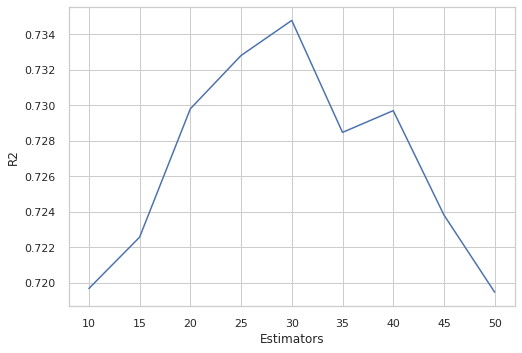

,Train Score,Test Score
30,0.948593,0.734774
25,0.950654,0.7328
20,0.949814,0.729799
40,0.946028,0.729698
35,0.945867,0.728474


In [84]:
estimators = [10, 15, 20, 25, 30, 35, 40, 45, 50]
bag_scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])
for num_estimators in estimators:
   bag_reg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
   bag_reg.fit(X_train, y_train)
   bag_train_score = bag_reg.score(X_train, y_train)
   bag_test_score = bag_reg.score(X_test, y_test)
   bag_scores.loc[num_estimators, 'Train Score'] = bag_train_score
   bag_scores.loc[num_estimators, 'Test Score'] = bag_test_score

plt.xlabel('Estimators')
plt.ylabel('R2');
plt.plot(bag_scores['Test Score'])
plt.show()
bag_scores = bag_scores.sort_values(by='Test Score', ascending=False)
bag_scores.head()

,Test Score,Train Score
26,0.733091,0.948487
27,0.733046,0.94851
24,0.73304,0.951288
22,0.732917,0.95321
28,0.732678,0.946537


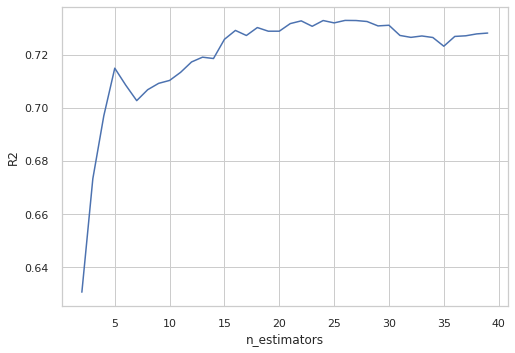

In [82]:
estimators2 = list(range(2, 40))
rf_scores = pd.DataFrame(index=estimators2, columns=['Test Score','Train Score'])
for estimator in estimators2:
    rf = RandomForestRegressor(n_estimators=30, random_state=42)
    rf.fit(X_train, y_train)
    rf_train_score = rf.score(X_train, y_train)
    rf_test_score = rf.score(X_test, y_test)
    rf_scores.loc[estimator, 'Train Score'] = rf_train_score
    rf_scores.loc[estimator, 'Test Score'] = rf_test_score
plt.plot(estimators2, rf_scores['Test Score'])
plt.xlabel('n_estimators')
plt.ylabel('R2');
rf_scores = rf_scores.sort_values(by='Test Score', ascending=False)
rf_scores.head()